# Bank services and customer retention: analysis of churn and improvement strategies for retention

## Introduction
<p> Banks provide services and products to customers. Good quality customer services and relevant products marketed to the correct groups can help banks retain customers and maintain a steady customer base. Customer data analysis can help identify deficiencies in the banks' services and products, helping management focus on improvement of the services, thus reducing churn. </p>
<p> Background:'Churn'in the banking and industrial section refers to customers leaving and joining another service provider.</p>

### Objective
<ol>
    <li>Build a deep learning model for customer churn predictions</li>
    <li>Analysis of the data and summary of the strategies for customer retention</li>
   

### Data Information/Variables
<p> <strong>CustomerId</strong> - unique ID assigned to each customer<br>
    <strong>Surname</strong> - last name of the customer<br>
    <strong>CreditScore</strong> - score indicating the credit history of the customer<br>
    <strong>Geography</strong> - location of the customer<br>
    <strong>Gender</strong> - gender of the customer<br>
    <strong>Age</strong> - age of the customer<br>
    <strong>Tenure</strong> - number of years which the customer has been with the bank<br>
    <strong>NumOfProducts</strong> - refers to number of products that customer has purchased from bank<br>
    <strong>Balance</strong> - account balance<br>
    <strong>HasCrCard</strong> - categorical variable that decides whether the customer has credit card or not<br>
    <strong>EstimatedSalary</strong> - estimated salary<br>
    <strong>isActiveMember</strong> - categorical variable indicating whether customer is an active member of the bank  (whether customer uses bank products, makes transactions)<br>
    <strong>Exited</strong> - categorical variable that decides whether the customer left the bank within six months or not. Value of 0 means No (customer did not leave), value of 1 is Yes (customer left the bank).<br>
    </p>

### The analysis below has the following sections:
<ol>
    <li> Loading and importing packages </li>
    <li> Removing warnings from python notebooks </li>
    <li> Loading the dataset </li>
    <li> Preview of the dataset </li>
    <li> Descriptive statistics for the dataset </li>
    <li> Exploratory Data Analysis - univariate, bivariate and multivariate analysis,insights based on EDA </li>
    <li> Data preprocessing/model preparation - feature engineering, missing value  checks and outlier treatment, duplicate observations analysis, splitting dataset for training and testing, scaling</li>
    <li> <strong>Neural network model</strong> - building the neural network model</li>
    <li> <strong>Neural network performance improvement </strong> - analysis of model performance, improvement of the model</li>
    <li> Summary and key takeaways - final conclusions and summary of the analysis </li>

## 1. Loading and importing packages

In [1]:
#!pip install tensorflow
#This was for installing tensorflow

In [2]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(color_codes=True)  # For background of the graphs
%matplotlib inline

# For previewing the data, the columns can be set to limit of None and 100 for the rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# To be used for data preprocessing for clustering
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt


import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


#This is to reduce the variation in the results everytime the notebook is run
import random
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

from sklearn.utils import class_weight

from sklearn.metrics import roc_curve

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# For automatic structuring/beautification of the python notebook
#%load_ext nb_black

### 2. Removing warnings from python notebook

In [3]:
# Removing warnings from the notebook
import warnings

warnings.filterwarnings("ignore")

### 3. Loading the dataset

In [4]:
# The dataset is stored in a CSV file and we want to read it into a pandas dataframe
customerData = pd.read_csv("bank.csv", index_col=0)
# We are using index_col = 0, otherwise the dataframe had the first column as an index, and then"ID" as an index again.
# Using index_col = 0 will make the dataframe have "ID" as the first column.
print(f"The dataframe has {customerData.shape[0]} rows and {customerData.shape[1]} columns.")
# Using f-string to print the statement for performance reasons

The dataframe has 10000 rows and 13 columns.


### 4. Previewing the dataset

In [5]:
# Preview of 10 random rows of the dataset
# To see random 10 rows, numpy's random seed was used.
# Putting random.seed to be 1 will return the same random 10 rows everytime we execute the code.
np.random.seed(1)
customerData.sample(n=10)
# The Reason we want to return random rows is so that we can see  the typical values from a random sample.

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0


#### Observation
<p> The random rows do not show any missing values, or NaNs. The Geography column is showing country names. For the Balance column, there are number of rows that are 0 - this could mean that some of the customers do not have money in their bank account, or that the data is incomplete. The columns HasCrCard, IsActiveMember, Exited are in the form of Yes/No data where 1 is most likely to correspond with Yes, and 0 means a negative answer.This will facilitate their treatment as categorical variables for the analysis. </p>

In [6]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


#### Observation
<p> There are no missing values in this dataset as there are 10000 non-null values for each column. All the columns are of the type int64, float 64 or object.</p>

In [7]:
# Finding the sum total of missing values in each of the columns
customerData.isnull().sum().sort_values(ascending=False)

Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
Balance            0
Tenure             0
Age                0
Gender             0
Geography          0
CreditScore        0
Surname            0
CustomerId         0
dtype: int64

#### Observation
<p>This confirms our earlier observation that none of the columns have any missing values or null values.</p>

### 5. Descriptive Summary Statistics for the dataset

In [8]:
# Before starting preprocessing, a look at summary statistics
customerData.describe().T  # taking transpose since it is easier to view

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


#### Observations 
<ol>
    <li>The customerId is a unique identifier for the customers and will be dropped in the preprocessing section.</li>
    <li>The CreditScore feature has a mean of 650 and a median of 652, which are close indicating that this feature will be a symmertric distribution. The minimum CreditScore was 350 and the maximum was 850. 75 percent of the customer had a credit score of 718 or higher (usually considered good credit scores).</li>
    <li>Age had a mean of 38 years and the median was 37 years, which is again close so age is likely to be a symmetric distribution. The minimum age was 18 years old and the maximum was 92 years old. 75% of the customers had an  age greater than 44 years, indicating that the customer base is middle aged or higher in age. </li>
    <li>The column Tenure's mean and median was around 5 years, and the feature is a symmetric distribution. 75 percent of the customers had stayed 7 years or longer. The minimum tenure is 0 years - which could indicate that the customer has been less than a year with the bank, or that the data collection was incomplete for that customer. </li>
    <li>Balance is a continous variable, with customers having an average of 76,485 and a median of 97,198. The units are unknown since the customers geographic location are from different countries. However, differences in the mean and median indicate a skewed distribution. The tail is on the left hand side, so the distribution is most likely a left-skewed distribution. /li>
    <li>Customers had an average of 1.53 products (median of 1) from the bank. 75 percent of the customers had 2 products from the bank. </li>
    <li>The estimated salary of the customers was between 11.58 and 199992.48. The units are unknown because the customers belong to different countries. The mean was 100090.2 and the median was 100193.9 which are close, hence this continous variable is also a symmetric distribution. </li>
    <li> The variables HasCrCard,IsActiveMember and Exited are of the form 0/1 so they will have values between 0 and 1.</li>
     </ol>

In [9]:
#Summary statistics for the non-numerical columns
customerData.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### Observations 
<ol>
    <li> The "Surname" variable is of the type object, and has 2932 unique values, where the last name Smith occured frequently.</li>
    <li> "Geography" had 3 unqiue values, with France occuring 5014 times. So atleast half the data represents customers from France.</li>
    <li> "Gender" is of type object, and had 2 unique values, with more than half of the customers being male.</li>
   

In [10]:
# Descriptive statistics on categorical variables
# Let us take a look at how many of the current customers took a travel package in the last campaign.
customersExitedCount = pd.crosstab(index=customerData["Exited"], columns="count")
customersExitedCount
customersExitedYes = (customersExitedCount.loc[1] / (customerData.shape[0])) * 100
customersExitedYes
print(f"The percentage of customers who left the bank is {float(customersExitedYes)}.")

The percentage of customers who left the bank is 20.369999999999997.


#### Observations
Out of the 10,000 customers, 20.36 percent of the customers left the bank and sought services and products elsewhere. 

In [11]:
# We can take a look at how many customers are geographically distributed
CountryCount = pd.crosstab(index=customerData["Geography"], columns="count")
CountryCount

col_0,count
Geography,
France,5014
Germany,2509
Spain,2477


#### Observations
<p> As we saw earlier, more than half of the customers were from France. The remaining customers were divided between Germany (2509) and Spain (2477). </p>

In [12]:
# We want to take a look at how many customers from which location exited the bank
CountryExitedData = pd.crosstab(customerData.Geography, customerData.Exited)
CountryExitedData

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


#### Observations
<p>We can see above that out of the 5014 customers from France, 16.15 percent (810 customers) exited the bank which was comparable to Spain (16.6%). The percentage of customers who exited the bank was much higher in Germany where it was 32 percent.</p>

In [13]:
# To look at the number of unique values in each column:
customerData.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Observations
<p>We can see that the following columns have only 2 unique values: Exited, IsActiveMember and HasCrCard. Geography has 3 unique values as seen before, Gender has 2, and NumOfProducts has 4 unique values. </p>

In [14]:
# To see the unique value in the columns that have 2 unique values
two_value_cols = ["Exited", "IsActiveMember", "HasCrCard"]
for column in two_value_cols:
    print(customerData[column].value_counts())
    print("*" * 25)

0    7963
1    2037
Name: Exited, dtype: int64
*************************
1    5151
0    4849
Name: IsActiveMember, dtype: int64
*************************
1    7055
0    2945
Name: HasCrCard, dtype: int64
*************************


#### Observations
<p> 2037 customers( around 20%) left the bank, 5151 customers were active members of the bank and around 7055 customers had a credit card with the bank.</p>

### 6. Exploratory Data Analysis - univariate, bivariate and multivariate analysis

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

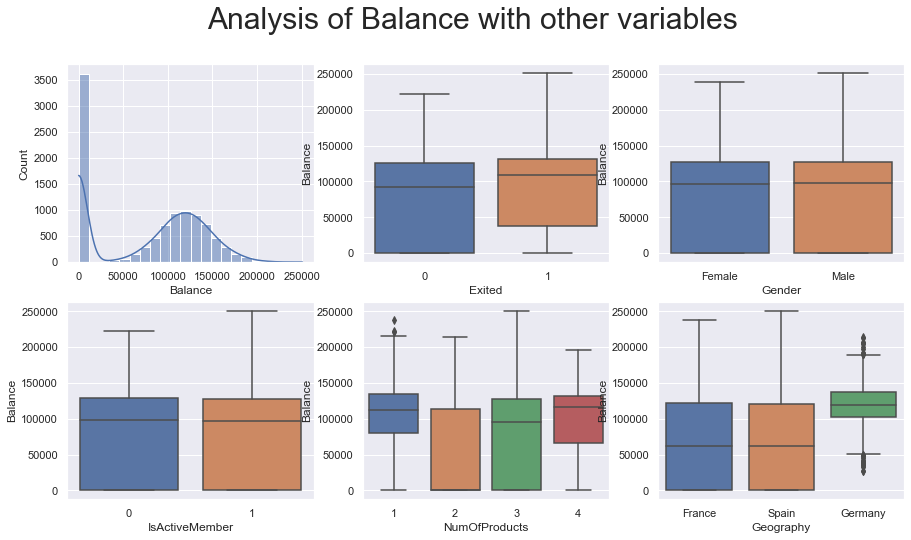

In [15]:
# Univariate and bivariate analysis
# We can start with analysis of 'Balance' - histogram and box plots of 'Balance' 
# versus 'Exited','HasCrCard','IsActiveMember', 'NumOfProducts', "Geography","Gender"
#'Balance' here is the continous variable
# While variables such as 'Exited' have type int64, they have values of 0 and 1, so we can treat it as a categorical variable.
# Display histogram and boxplots for Balance analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of Balance with other variables", fontsize=30)
# Histogram of Balance variable
sns.histplot(ax=axs[0, 0], data=customerData, x="Balance", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData,
    x=customerData["Exited"],
    y=customerData["Balance"],
)
# The remaining boxplots have Balance on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData,
    x=customerData["Gender"],
    y=customerData["Balance"],
)

sns.boxplot(
    ax=axs[1, 0],
    data=customerData,
    x=customerData["IsActiveMember"],
    y=customerData["Balance"],
)
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["NumOfProducts"],
    y=customerData["Balance"],
)
sns.boxplot(
    ax=axs[1, 2],
    data=customerData,
    x=customerData["Geography"],
    y=customerData["Balance"],
)
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> The feature 'Balance' refers to the customer account balance that they have with the bank. From the histogram, we can see that there are several thousand values where customers have 0 balance in their account. This can be interpreted as customers actually having 0 (units unknown, but we can guess Euros since it is France, Germany and Spain) euros in their account, or it is possible that the data collection was incomplete.Because of the possibility that the customers can have 0 in their account, we will not treat these values as missing values and regard them as actual data.</li>
    <li>The 'Balance' otherwise is a fairly symmetric distribution with a peak between 100,000 and 150,000.</li>
    <li> The Box plot for 'Balance' versus 'Exited' variable shows that there is no significant difference in the medians for 0 category and 1 category. This can be interpreted as that there was no differences in the median balance for the customers who left the bank versus the customers who did not leave the bank.</li>
    <li> Similarly, there was no differences in the median balance between the male and female customer as well as no median differences between the account balance between customers who were active members (defined as customers who are making transactions or using bank products regularly) and who were not active members. </li>
    <li> For 'NumOfProducts', which represents how many products the customers have bought or have with the bank, there are some outliers present for the customers who had 1 product with the bank. These outliers represent customers who have an account balance between 200,000 and 250,000. These values are again possible for a customer to have, so we shall not treat these outliers in the data pre-processing section as they can be real data. With regards to the mean, there is mostly no significance difference between the medians for customers who bought 1,2,3 or 4 products.</li>
    <li> When it comes to 'Geography', there is a slight difference in the median account balance for customers in Germany (slightly higher) as compared to customers in France or Spain. There are outliers also present in the Germany section of the box plot, however, these can again represent real data and hence will not be treated in the data pre-processing section.</li>
     </ol>

<AxesSubplot:xlabel='Geography', ylabel='CreditScore'>

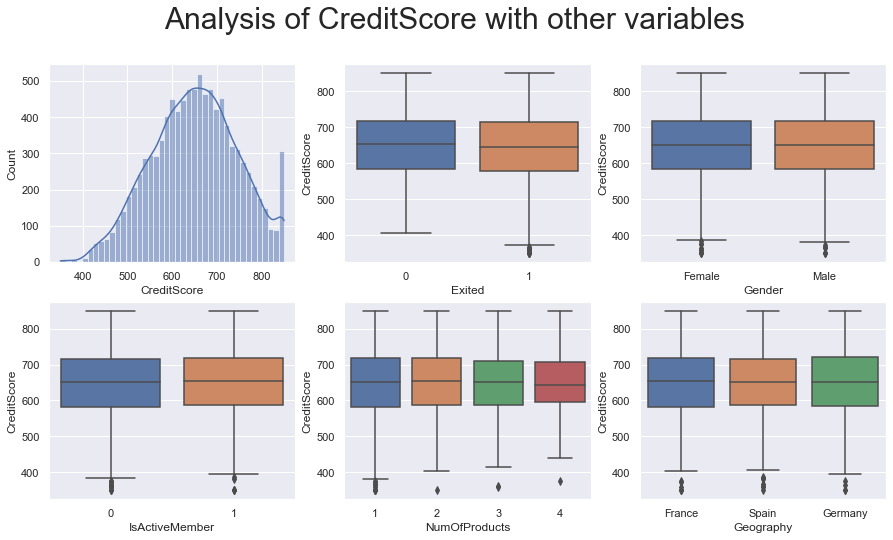

In [16]:
# Univariate and bivariate analysis
# This section deals with analysis of 'CreditScore' - histogram and box plots of 'CreditScore'
# versus 'Exited','Gender','IsActiveMember', 'NumOfProducts', "Geography","Gender"
#'CreditScore' here is the continous variable
# While variables such as 'Exited' have type int64, they have values of 0 and 1, so we can treat it as a categorical variable.
# Display histogram and boxplots for CreditScore analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of CreditScore with other variables", fontsize=30)
# Histogram of Balance variable
sns.histplot(ax=axs[0, 0], data=customerData, x="CreditScore", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData,
    x=customerData["Exited"],
    y=customerData["CreditScore"],
)
# The remaining boxplots have CreditScore on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData,
    x=customerData["Gender"],
    y=customerData["CreditScore"],
)

sns.boxplot(
    ax=axs[1, 0],
    data=customerData,
    x=customerData["IsActiveMember"],
    y=customerData["CreditScore"],
)
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["NumOfProducts"],
    y=customerData["CreditScore"],
)
sns.boxplot(
    ax=axs[1, 2],
    data=customerData,
    x=customerData["Geography"],
    y=customerData["CreditScore"],
)
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> The feature 'CreditScore' is a mostly symmetric distribution, with a peak between 600 and 750. However, there is another peak at 800 where about 300 customers have a credit score of more than 800.The maximum credit score one can have is 850, and the 300 customers having score more than 800 is possible, hence can represent real data.</li>
    <li> There are some outliers present in the box plot for 'CreditScore' versus 'Exited' for the category of custoemrs who left the bank. These can represent real data as well since it is possible to get credit scores less than 400. In general, there was no significant difference in the median credit scores between the categories of customers who remained with the bank and customers who left the bank. </li>
    <li> The same was true for the median credit score for male versus female category of customers. The box plot for 'Gender' versus 'CreditScore' shows outliers present, but this can again represent real data as it is possible to have credit scores less than 400.</li>
    <li> There was no significant difference in the median credit scores between customers who were active members of the bank versus the customers who were not active members in the bank.</li>
    <li> There were no significant differences in the median credit scores for category of customers who were active members or not, or among customers who belonged to France, Germany or Spain. There were no significant differences in the median credit scores of customers who bought 1,2,3 or 4 products from the bank. The box plots for these do show outliers, but could represent real data.</li>
    </ol>

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

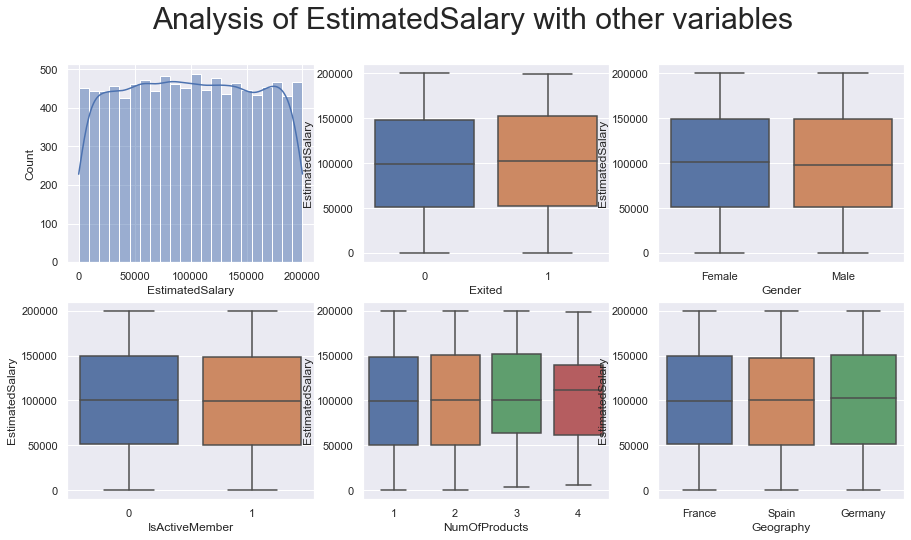

In [17]:
# Univariate and bivariate analysis
# Analysis of 'EstimatedSalary' - histogram and box plots of 'EstimatedSalary'
# versus 'Exited','Gender','IsActiveMember', 'NumOfProducts', "Geography","Gender"
#'EstimatedSalary' here is the continous variable
# While variables such as 'Exited' have type int64, they have values of 0 and 1, so we can treat it as a categorical variable.
# Display histogram and boxplots for EstimatedSalary analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of EstimatedSalary with other variables", fontsize=30)
# Histogram of Balance variable
sns.histplot(ax=axs[0, 0], data=customerData, x="EstimatedSalary", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData,
    x=customerData["Exited"],
    y=customerData["EstimatedSalary"],
)
# The remaining boxplots have EstimatedSalary on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData,
    x=customerData["Gender"],
    y=customerData["EstimatedSalary"],
)

sns.boxplot(
    ax=axs[1, 0],
    data=customerData,
    x=customerData["IsActiveMember"],
    y=customerData["EstimatedSalary"],
)
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["NumOfProducts"],
    y=customerData["EstimatedSalary"],
)
sns.boxplot(
    ax=axs[1, 2],
    data=customerData,
    x=customerData["Geography"],
    y=customerData["EstimatedSalary"],
)
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> The feature 'EstimatedSalary' looks mostly symmetric but with a wide base and no prominent peak. The range is from 0 to 200,000. </li>
    <li> There was no siginificant difference in the median estimated salary for customers who remained with the bank and with custoemrs who left the bank. The same is true for estimated salaries for male and female customers as well. </li>
    <li> There was no significant differences in the median estimated salaries for customers who were active members and not active members, customers who held 1,2,3 or 4 bank products, or for customers who were from France, Germany or Spain. </li>
</ol>

<AxesSubplot:xlabel='Geography', ylabel='Age'>

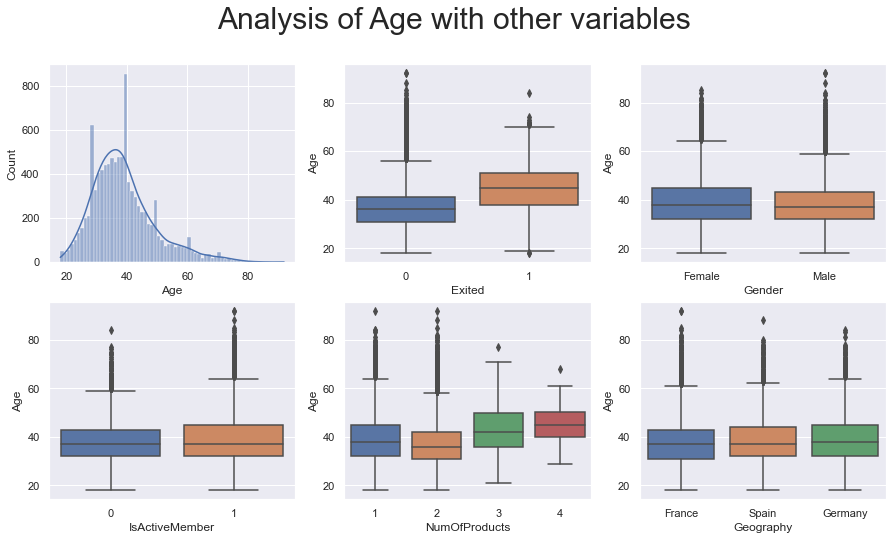

In [18]:
# Univariate and bivariate analysis
# Analysis of 'Age' - histogram and box plots of 'Age'
# versus 'Exited','Gender','IsActiveMember', 'NumOfProducts', "Geography","Gender"
#'Age' here is the continous variable
# While variables such as 'Exited' have type int64, they have values of 0 and 1, so we can treat it as a categorical variable.
# Display histogram and boxplots for Age analysis
# Make a grid of 2 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
# Put a figure title
fig.suptitle("Analysis of Age with other variables", fontsize=30)
# Histogram of Balance variable
sns.histplot(ax=axs[0, 0], data=customerData, x="Age", kde=True)
# Box plot for Personal_Loan versus Income
sns.boxplot(
    ax=axs[0, 1],
    data=customerData,
    x=customerData["Exited"],
    y=customerData["Age"],
)
# The remaining boxplots have Age on the y-axis, and the rest of the variables on the x-axis (so treated as categories)

sns.boxplot(
    ax=axs[0, 2],
    data=customerData,
    x=customerData["Gender"],
    y=customerData["Age"],
)

sns.boxplot(
    ax=axs[1, 0],
    data=customerData,
    x=customerData["IsActiveMember"],
    y=customerData["Age"],
)
sns.boxplot(
    ax=axs[1, 1],
    data=customerData,
    x=customerData["NumOfProducts"],
    y=customerData["Age"],
)
sns.boxplot(
    ax=axs[1, 2],
    data=customerData,
    x=customerData["Geography"],
    y=customerData["Age"],
)
# We put semicolons to supress the axis output

#### Observations
<ol>
    <li> The feature 'Age' is a right-skewed distribution with the tail to the right. This indicates that the customers who were older are less than the customers who were less than 40. The peak age for customers is between 35 and 45 years of age.</li>
    <li> There is a significance difference in the median age of customers who remained with the bank (0) versus the customers who left the bank (1). The customers who left the bank had a higher median age (around 45 years) compared to those who remained with the bank (35). The box plot also shows outliers for both categories - however, it is possible for the bank to have customers who are 60 and older, as well as customers who are less than 20. So this is mostly likely real data, and thus will not be treated as outliers. </li>
    <li> With respect to gender, there was no siginificant difference in customer age for male or female customers. There are outliers present, but this can be actual real data as it is possible for bank to have older customers. </li>
    <li> There was no significant differences in age for the other 3 box plots - active member and not active member, customers buying 1,2,3 or 4 bank products and customers from France, Germany or Spain. The outliers in the 3 box plots can also represent real data. </li>
    
</ol>

<AxesSubplot:xlabel='Exited', ylabel='count'>

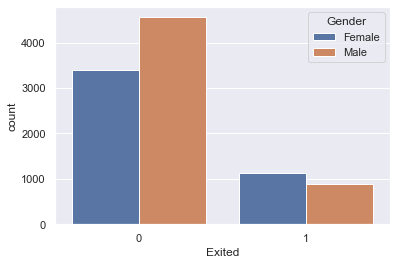

In [19]:
# Analysis between category type variables
sns.countplot(x="Exited", hue="Gender", data=customerData)

#### Observations
<p> In the above graph, we can see that the count was higher for male customers who remained with the bank, as compared to the female gender. For category of customers who left the bank, the female customers count was higher than the male customers. This indicates that among the customers who left the bank, a lot more were female members than the male members. </p>

<AxesSubplot:xlabel='Exited', ylabel='count'>

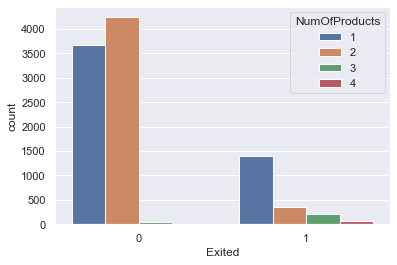

In [20]:
# Analysis between category type variables
sns.countplot(x="Exited", hue="NumOfProducts", data=customerData)

#### Observations
<p> When we look at the graph for customers who remained with the bank and who left the bank and how many bank products they have, we can interpret that among the customers who remained with the bank, majority of the customers had 1 or 2 products, with no customers having 4 products. But among customers who left the bank, they had 1,2,3, or 4 products, even though the majority had 1 product. This indicates that dissatisfaction could be present among customers who had multiple products with the bank.</p>

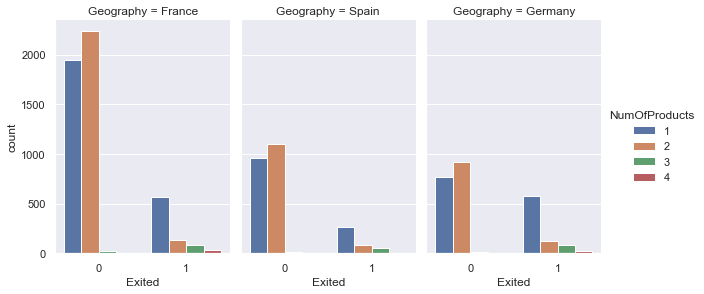

In [21]:
# Analysis using both numerical and categorical variables
g = sns.catplot(
    x="Exited",
    hue="NumOfProducts",
    col="Geography",
    data=customerData,
    kind="count",
    height=4,
    aspect=0.7,
)

#### Observations
<p> In France, Spain and Germany - among the customers who remained with the bank, majority of the customers had 1 or 2 products (with customers having 2 products were more than teh customers who had 1 product). In all 3 countries, among customers who left the bank, majority of the customers had 1 product, but some of them had 2,3,and 4 products as well.</p>

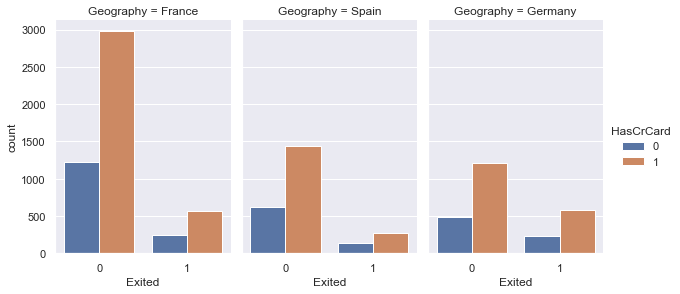

In [22]:
# Analysis using both numerical and categorical variables
g = sns.catplot(
    x="Exited",
    hue="HasCrCard",
    col="Geography",
    data=customerData,
    kind="count",
    height=4,
    aspect=0.7,
)

#### Observations
<p> In France, Spain and Germany - among the customers who remained with the bank and who left, the customers who had credit card as a product from the bank were much higher than the customers who did not have a credit card. </p>

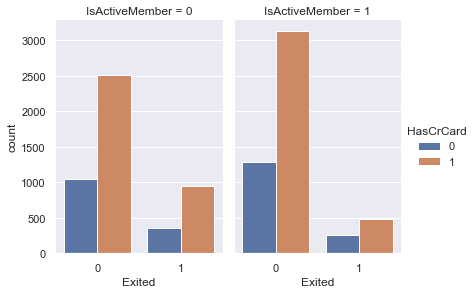

In [23]:
# Analysis using both numerical and categorical variables
g = sns.catplot(
    x="Exited",
    hue="HasCrCard",
    col="IsActiveMember",
    data=customerData,
    kind="count",
    height=4,
    aspect=0.7,
)

#### Observations
<p> Among active members, customers who remained with the bank and who left the bank - both categories had more customers who had a credit card. The same was true for customers who were not active members. But among customers who were active members and who had a credit card, those customers were more likely to remain with the bank.</p>

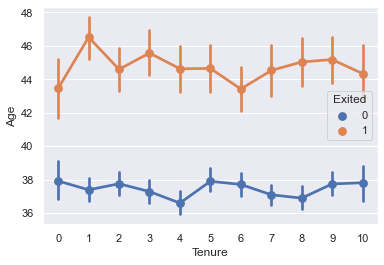

In [24]:
# Analysis using both numerical and categorical variables
sns.pointplot(x="Tenure", y="Age", hue="Exited", data=customerData)
plt.show()

#### Observations
<p> If we look at age, and at the tenure (number of years the customer has been with the bank), we can clearly see that customers who remained with the bank were younger regardless of how many years they had been with the bank. Customers who left the bank had a higher age regardless of tenure.</p>

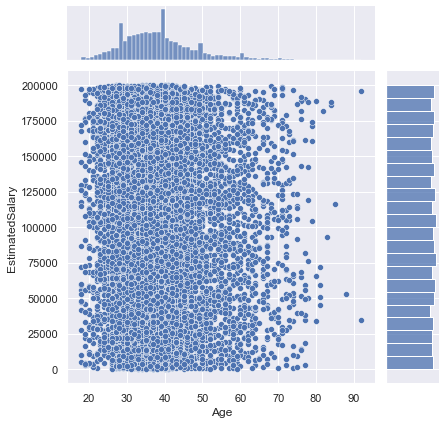

In [25]:
# Bivariate analysis on age and income
sns.jointplot(customerData["Age"], customerData["EstimatedSalary"])

#### Observations
<p> We can observe above that customers who were older were much less in count than customers who were between 20 and 65 when it comes to estimated salary. 65 represents the most common retirement age, so it is not unusual to see less older customers having an estimated salary.</p>

<AxesSubplot:xlabel='Tenure', ylabel='Age'>

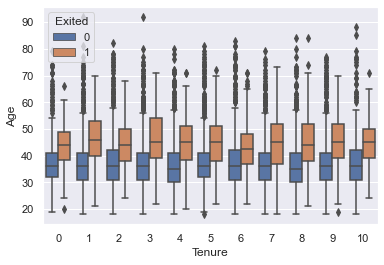

In [26]:
sns.boxplot(
    data=customerData,
    x=customerData["Tenure"],
    y=customerData["Age"],
    hue=customerData["Exited"],
)

#### Observations
<p> The customers who left the bank had a significant higher age as compared to the customers who remained with the bank. The above box plot also shows that there are more outliers for the category of customers who remained with the bank, and less outliers for customers who left the bank. This can be interpreted as being influenced by the fact that customers who left the bank are fewer in the data set (imbalanced data set) as compared to the customers who remained. </p>

<AxesSubplot:xlabel='Gender', ylabel='Age'>

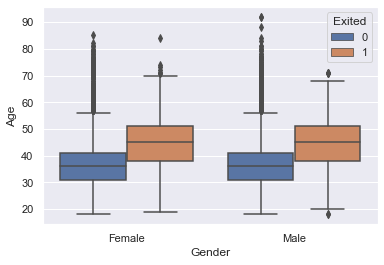

In [27]:
sns.boxplot(
    data=customerData,
    x=customerData["Gender"],
    y=customerData["Age"],
    hue=customerData["Exited"],
)

#### Observations
<p> Female customers had less outliers as compared to the male customers when plotted with age - as we saw in the summary section, the male count in the dataset was slightly higher (5457) s compared to females. Hence, the outliers differences are not due to imbalance in the data points as such. It is possible that the mean age of the male customers are older (as seen above) for both customers who remained with the bank as well as those who left the bank. </p>

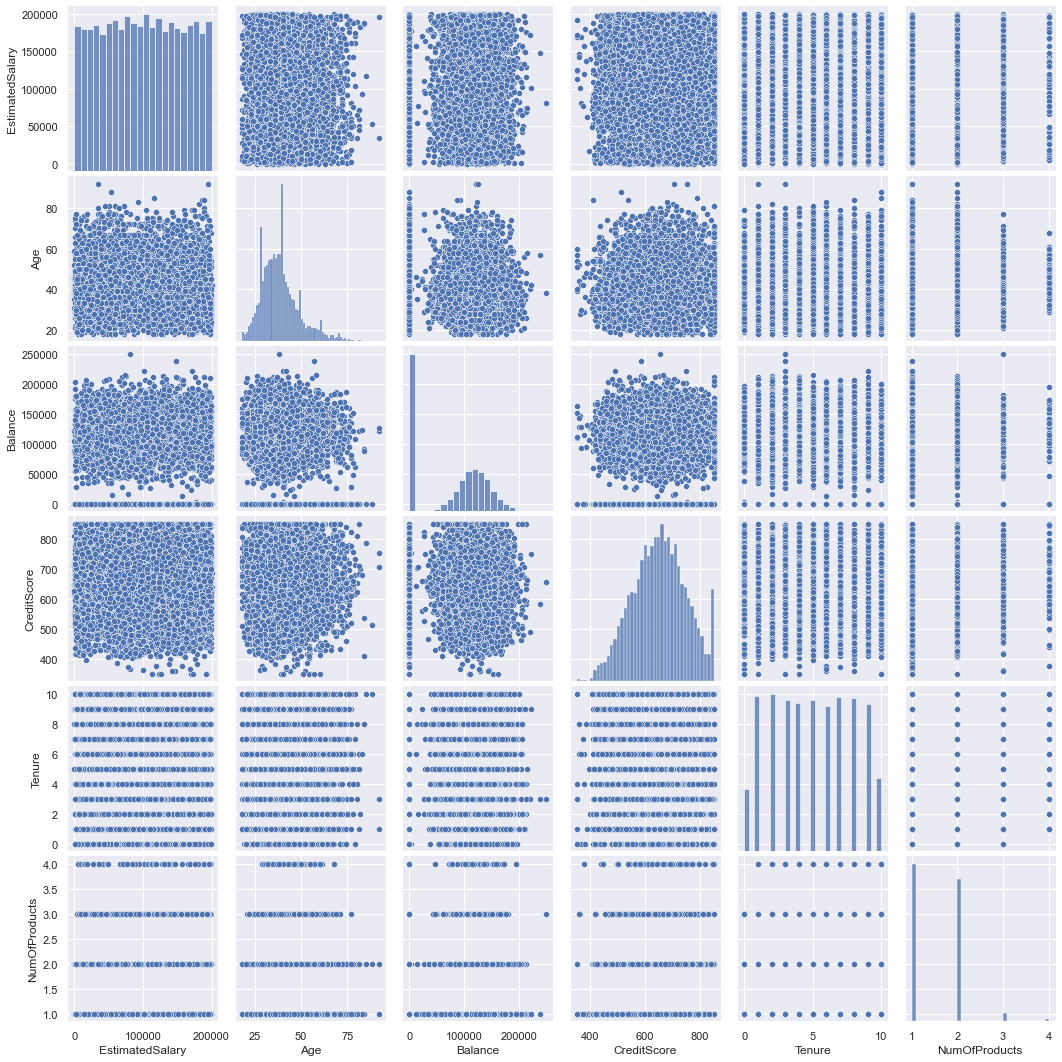

In [28]:
# For the pairplot, we will skip the columns have binary data in the form of "0" and "1" and other category type data
sns.pairplot(
    customerData,
    x_vars=["EstimatedSalary", "Age", "Balance", "CreditScore","Tenure","NumOfProducts"],
    y_vars=["EstimatedSalary", "Age", "Balance", "CreditScore","Tenure","NumOfProducts"],
)

#### Observations
<ol>
    <li> We can see from the above pair plot that the estimated salary does not have a peak especially when compared to age, balance and credit score. </li>
    <li> Estimated Salary with respect to Age, Balance, Credit Score, Tenure and NumOfProducts is almost equally distributed (showing no distinct groups). </li>
    <li> The Age distribution versus Balance and Credit Score is mostly one group as is balance versus credit score. </li>
    <li> When we look at the pairplot of NumOfProducts and Age, we can see that the number of customers who had 4 products were less (and younger) than the customers who had 1 or 2 products. </li>

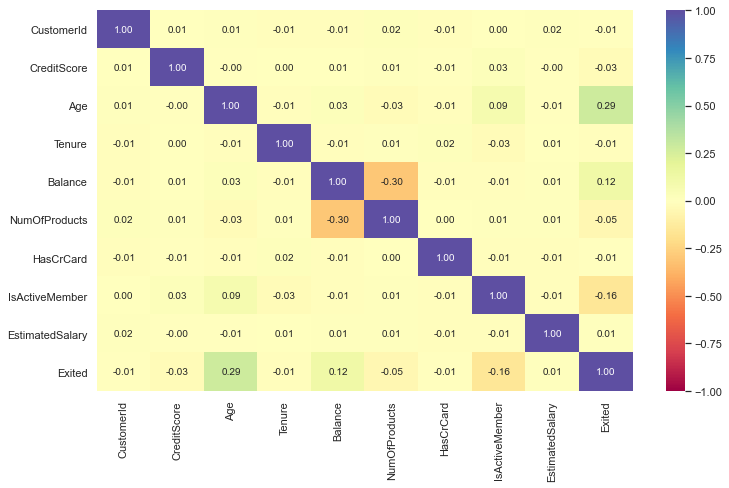

In [29]:
#Multivarite analysis
plt.figure(figsize=(12, 7))
sns.heatmap(
    customerData.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
<ol>
    <li> We can conclude from the correlation map above that no strong or moderate correlation exists between the features for this dataset. </li>
    <li> There is some weak correlation (0.29) between Age and whether customers left the bank or remained with the bank. </li>
    <li> There is some weak negative correlation between the balance and NumOfProducts.</li>
    <li> Since there are no higly correlated features, we will not be eliminating features based on correlation. </li>

### 7. Data pre-processing section


<p> This section will have the following subsections:</p>
<ol>
    <li> Duplicate value check</li>
    <li> Feature Engineering </li>
    <li> Evaluation of outliers </li>
    <li> Splitting into target variable and predictors </li>
    <li> Splitting into train-test dataset </li>
    <li> Scaling </li>

In [30]:
# Copying the dataframe again before we perform pre-processing on the data
customerData1 = customerData.copy()

In [31]:
#7.1 Duplicate observations
customerData1.duplicated().sum()

0

#### Observations
<p> There are no duplicated values in the dataset hence no preprocessing of data is needed for this section. </p>

In [32]:
#7.2 Feature Engineering/dropping columns
#We drop the CustomerId and surname columns as they are used for identification of customers and
#do not provide meaningful data in analyzing customers who are leaving/remaining in the bank
customerData1.drop("CustomerId", axis=1, inplace=True)

In [33]:
customerData1.drop("Surname", axis=1, inplace=True)

In [34]:
# To see data types and non-null counts for all the columns
customerData1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.2+ MB


#### Observations
<p> We dropped the two columns 'CustomerId' and 'Surname'. As mentioned in the EDA section, we will not be dropping any more featuers as no strong or moderate correlation was found between the features.</p>

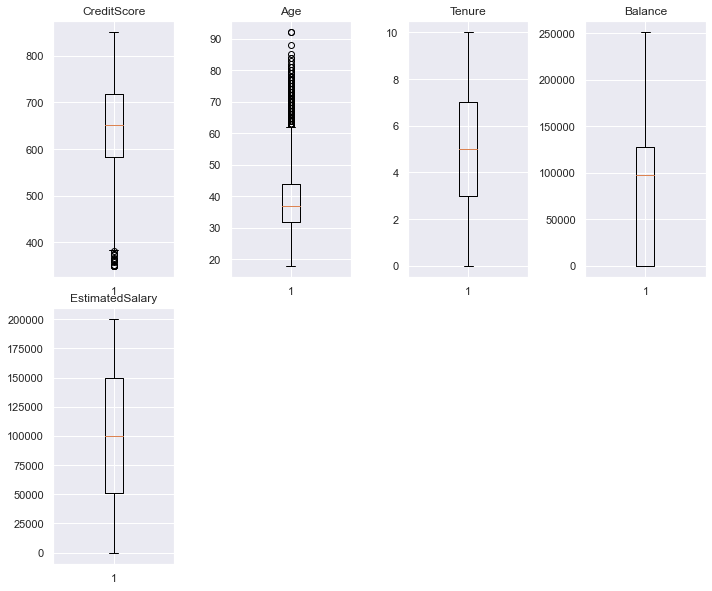

In [35]:
# 7.3 Evaluation of outliers
numerical_col = ["CreditScore", "Age", "Tenure", "Balance","EstimatedSalary"]
plt.figure(figsize=(10, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(customerData1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observation
<p> As we observed during the EDA section as well, the outliers here can be meaningful data as customers can be older in age, as well as customers can have credit scores less than 400. Thus, we will not be doing any outlier treatment for this dataset.</p>

In [36]:
# Copying the dataframe again before we split the dataset
customerData2 = customerData1.copy()

In [37]:
#Get the dummies first
#creating dummy variables for the categorical features
customerData3 = customerData2.copy()
customerData3 = pd.get_dummies(customerData3,drop_first=True)
#customerData3 = customerData3.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
customerData3

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


#### Observation
<p> As we observed during the EDA section as well, the outliers here can be meaningful data as customers can be older in age, as well as customers can have credit scores less than 400. Thus, we will not be doing any outlier treatment for this dataset.</p>

In [38]:
# 7.4 Splitting into target variable and predictors
# Dependent variable/target variable = Exited
X = customerData3.drop(
    ["Exited"], axis=1
)  # Dropping it from independent variable group
Y = customerData3["Exited"]

In [39]:
# 7.5 Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
#Splitting the train set into  validation set and training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [40]:
#7.6 Scaling the data
scaler = preprocessing.StandardScaler()
# We are scaling the data using StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)


In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 11)
(2000, 11)
(6400,)
(2000,)


#### Observations
<p> This concludes the pre-processing section that prepares the data for the modeling. We have 11 column features in the training and testing set. The data is split 80-20 among training and testing which is futher split into validation and training set for the model. </p>

### 8. Building  the ANN model

#### ANN model 1 
<p> The first model that can be built for analysis can be a simple model. This model will have 5 fully connected layers and ReLu activation function will be used for the layers. This is a binary classification problem, so the output layer (using a sigmoid function for probabilities) will return 0 (remaining with the bank) or 1 (left the bank). </p>

<p> Note about model predictions </p>
<p> The dependent variable in this analysis is the Exited column. </p>
<p> When Exited = 0, this indicates that the customer remained with the bank. </p>
    When Exited = 1, this indicates that the customer left the bank. </p>
<p> To evaluate which performance metric is most valuable for the analysis, we have to consider</p>
<p> (a) Predicting that a customer will leave the bank, but the customer stayed - loss of opportunity (false positive)</p>
<p> (b) Predicting that a customer will stay, but the customer left the bank - loss of revenue (false negative)</p>
<p> For the bank, loss of revenue has a higher cost than loss of opportunity. Hence, we want to minimize false negatives, and thus, we shall use recall (sensitivity) as our most important performance metric for the models.</p> 

In [42]:
#Initialize the model
model = Sequential()

In [43]:
# Our data has 11 features, hence input_dim for the input layer will be 11
# The first hidden layer can have 16 neurons, and the activation function used will be ReLu
# The hyperparameters here are units and activation function
# We will utilize fully connected layers so are using 'Dense'
model.add(Dense(units=16, input_dim = 11,activation='relu'))   
# hidden layer
model.add(Dense(units=16,activation='relu'))
#Adding Dropout to prevent overfitting 
#model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
# Adding the output layer
# Our dataset has 2 classes (0 or 1), so we need 1 output node
# Sigmoid is used for output node for probability outcomes
model.add(Dense(1,activation='sigmoid')) 

In [44]:
# Create optimizer with default learning rate (0.001)
# The optimizer will update the weights for the above model
# 'adam' optimizer uses stochastic gradient technique to update the weights
# Since recall is the most important metric for this problem, we will use it for the metrics
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Recall'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


#### Observations
<p> The model summary shows that the model has 5 fully connected layers with 16 neurons for the hidden layers and 1 for the output layer. </p>

In [46]:
# Training the model (x_train will be the input, y_train will be the output)
# 10 epochs has been chosen here (indicating the number of times we are going to train the NN)
# We are choosing batch_size to be 15 here (number of rows processed before the model is updated)
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=20,validation_split=0.2)

Epoch 1/20
342/342 [==============================] - 2s 3ms/step - loss: 0.4819 - recall: 0.1016 - val_loss: 0.4308 - val_recall: 0.2873
Epoch 2/20
342/342 [==============================] - 1s 2ms/step - loss: 0.4187 - recall: 0.2832 - val_loss: 0.4156 - val_recall: 0.3097
Epoch 3/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3939 - recall: 0.3262 - val_loss: 0.3899 - val_recall: 0.3657
Epoch 4/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3678 - recall: 0.4092 - val_loss: 0.3816 - val_recall: 0.3470
Epoch 5/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3510 - recall: 0.4434 - val_loss: 0.3680 - val_recall: 0.4739
Epoch 6/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3408 - recall: 0.4453 - val_loss: 0.3654 - val_recall: 0.4813
Epoch 7/20
342/342 [==============================] - 1s 2ms/step - loss: 0.3355 - recall: 0.4688 - val_loss: 0.3616 - val_recall: 0.4701
Epoch 8/20
342/342 [==============

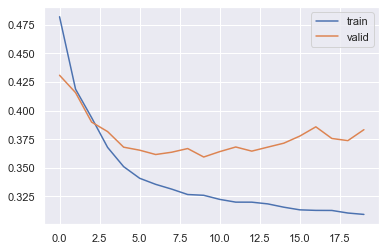

In [47]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#### Observations
<p> The blue curve is the visualization of the loss curve for training and the green curve is for validation. Both graphs indicate that they have a relatively good learning rate. The curves also show that 20 epochs is good enough to visualize the loss and  approximately 5-7 epochs will be sufficient to train the network.</p>

In [48]:
# Using the evaluate function for evaluation of the model for test data set
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3517 - recall: 0.4916


In [49]:
print(score)

[0.35166338086128235, 0.4915662705898285]


#### Observations
<p> The first model achieved a recall score of 49.15%. We will construct a confusion matrix to check accuracy, precision, recall and F1 scores. </p>

In [50]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

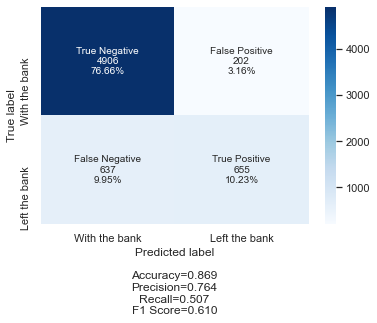

In [51]:
## Confusion Matrix on the train data set
import seaborn as sn
y_pred1 = model.predict(X_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'With the bank','Left the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories,
                      cmap = "Blues")

#### Observations for training performance
<p> True Positive: The model predicted customer will leave the bank, and customer left the bank. This is 16.16% for the ANN model 1. 

False Positive: The model predicted that customer will leave the bank, and customer did not leave the bank. This is where predicted = 1, but observed = 0. This is 16.66% above on the train set. 
    
True Negative: The model predicted that the customer will not leave the bank, and the customer did not leave the bank. This is where predicted = 0, and observed = 0. This is 63.16%. 

False Negative: The model predicted that the customer will not leave the bank, and the customer left the bank. This is where predicted = 0, observed = 1. This is 4.03% in the above train set performance. </p>

<p> The most important metric recall 50.7% for the ANN model 1 on the train data set. </p>

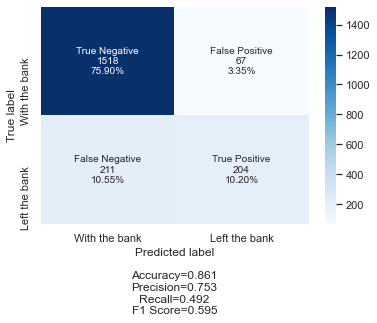

In [52]:
## Confusion Matrix on the test data set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'With the bank','Left the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories,
                      cmap = "Blues")

#### Observations for test set performance
<p> True Positive: The model predicted customer will leave the bank, and customer left the bank. This is 10.2% for the ANN model 1 test set. 

False Positive: The model predicted that customer will leave the bank, and customer did not leave the bank. This is where predicted = 1, but observed = 0. This is 3.35% above on the train set. 
    
True Negative: The model predicted that the customer will not leave the bank, and the customer did not leave the bank. This is where predicted = 0, and observed = 0. This is 75.90%. 

False Negative: The model predicted that the customer will not leave the bank, and the customer left the bank. This is where predicted = 0, observed = 1. This is 10.55% in the above test set performance. </p>

<p> The most important metric recall was 49.2% on the test data set for ANN model 1. Since the training set performance for recall was 50%, and it is 49.2% for the testing set. While this is close, overall, we want to reduce the false negatives found in the test data performance.</p>
<p> Thus, we will have to modify the model and hyperparameters to improve the performance of the model on the test data set. </p>

### 9. Improving model performance

#### Sections in improvement of model performance
<ol>
    <li> ANN Model 2: Adding weight initialization, dropout and early stopping callback to ANN Model 1, evaluation of performance </li>
    <li> ANN Model 3: Adjusting class imbalance by adjusting weights associated with customers who are leaving, evaluation of model performance </li>
    <li> ANN Model 4: Using ROC curve to optimize the threshold, evaluation of performance. </li>
    

#### 9.1 ANN Model 2
<p> This model will involve weight initialization (this will set the starting points for the weights for the optimization process). The dropout is a regularization technique (randomly selected neurons are ignored during training process). We will also include early stopping  process ( where the performance on the validation set can be terminated if there loss increases or recall decreases). </p>

In [53]:
#We can also increase the number of neurons per hidden layer and decrease the number of hidden layers we have 
# as compared to ANN model 1 

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights using hue_normal 
Model2.add(Dense(65, input_dim=11, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.1)) # To prevent overfitting
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.1))


Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['Recall'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=600, epochs=20, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/20
9/9 [==============================] - 1s 39ms/step - loss: 0.9069 - recall: 0.3555 - val_loss: 0.6548 - val_recall: 0.0746
Epoch 2/20
9/9 [==============================] - 0s 8ms/step - loss: 0.6399 - recall: 0.0664 - val_loss: 0.5969 - val_recall: 0.0037
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 0.5641 - recall: 0.0420 - val_loss: 0.5181 - val_recall: 0.0299
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 0.5101 - recall: 0.1299 - val_loss: 0.4738 - val_recall: 0.1194
Epoch 5/20
9/9 [==============================] - 0s 8ms/step - loss: 0.4808 - recall: 0.2363 - val_loss: 0.4555 - val_recall: 0.1828
Epoch 6/20
9/9 [==============================] - 0s 9ms/step - loss: 0.4602 - recall: 0.2402 - val_loss: 0.4456 - val_recall: 0.1567
Epoch 7/20
9/9 [==============================] - 0s 9ms/step - loss: 0.4496 - recall: 0.2422 - val_loss: 0.4371 - val_recall: 0.2052
Epoch 8/20
9/9 [==============================] - 0s 7ms/step

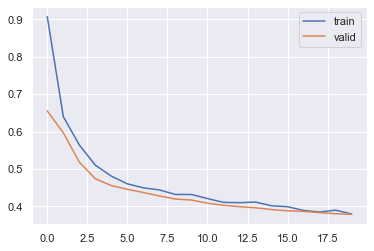

In [54]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#### Observations
<p> The blue curve is the visualization of the loss curve for training and the green curve is for validation. Both graphs indicate that they have a relatively good learning rate and both curves are close to each other so overfitting is unlikely. </p>

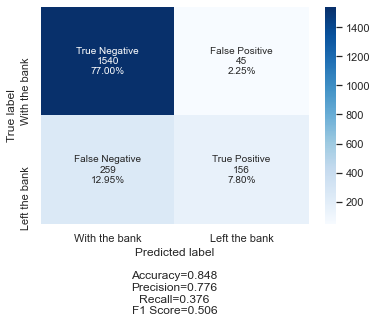

In [55]:
## Confusion Matrix on test data set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'With the bank','Left the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations
<p> With ANN Model 2, the recall went down to 37.6% on the test data set. While accuracy, precision did better on ANN Model 2 as compared to ANN Model 1, our aim here is to reduce the false negatives, so this model does not perform better than ANN Model 1. </p>

#### 9.1 ANN Model 3
<p> This model will involve using ANN Model 1, but we will attempt to correct for the class imabalance seen in the dataset. We will give additional weight importance to the loss associated with the errors for customers leaving the bank. </p>

In [56]:
#checking the percentage of each class in the original data set before splitting 
(customerData.Exited.value_counts())/(customerData.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

#### Observation
We can see that there is imbalance in the data. The customers who left are about 20% of the data.

In [57]:
#checking the percentage of each class in the training data set before splitting 
(y_train.value_counts())/(y_train.count())

0    0.798125
1    0.201875
Name: Exited, dtype: float64

#### Observation
<p> While the 20% for class 1 is preserved in the training data set, it is important to fix the class imbalance so as to improve the model performance. </p>

In [58]:
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6264682850430697, 1: 2.476780185758514}

In [59]:
model.fit(X_train,y_train,batch_size=15,epochs=20, class_weight=class_weights, shuffle=True)

Epoch 1/20
427/427 [==============================] - 2s 3ms/step - loss: 0.4496 - recall: 0.7500
Epoch 2/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4388 - recall: 0.7655
Epoch 3/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4348 - recall: 0.7678
Epoch 4/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4340 - recall: 0.7670
Epoch 5/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4317 - recall: 0.7740
Epoch 6/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4299 - recall: 0.7686
Epoch 7/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4302 - recall: 0.7732
Epoch 8/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4269 - recall: 0.7755
Epoch 9/20
427/427 [==============================] - 1s 2ms/step - loss: 0.4259 - recall: 0.7879
Epoch 10/20
427/427 [==============================] - 1s 3ms/step - loss: 0.4230 - recall: 0.7771
Epoch 11/20
427/427

In [60]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4523 - recall: 0.7494


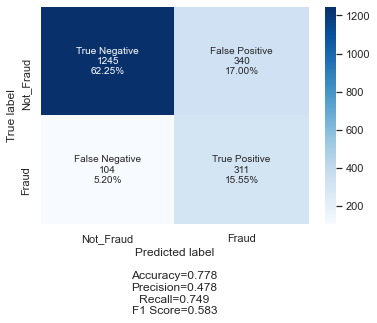

In [61]:
## Confusion Matrix on test data set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observations
<p> With ANN Model 3, fixing the imbalance in the data set by giving additional weightage to the errors caused by customer leaving the bank (which was 20% of the data), the recall has improved to 74.9% and the false negative is 5.20%. </p>

#### 9.3 ANN Model 4
<p> This model will involve using an ROC curve, and then finding the optimized threshold and using that optimized threshold in the confusion matrix for evaluation of performance metrics. </p>

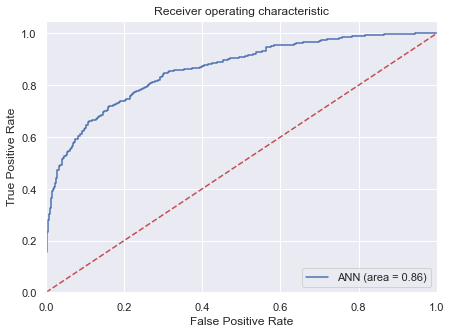

In [62]:
NN_roc_auc_train = roc_auc_score(y_test, model.predict(X_test)[:,0])
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,0])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="ANN (area = %0.2f)" % NN_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [63]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_roc = thresholds[optimal_idx]
print(optimal_threshold_roc)

0.5883993


#### Observation
<p> From the ROC curve above, we obtain the optimized threshold which is 0.5883 here. We will use this optimized threshold for the confusion matrix obtained in ANN Model 3. </p>

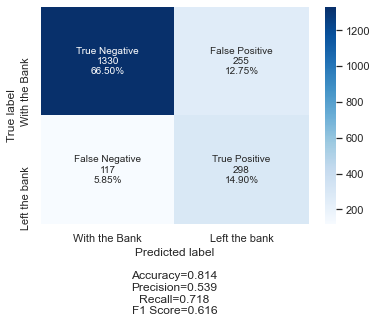

In [64]:
## Confusion Matrix on test data set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5883:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'With the Bank','Left the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Observation
<p> Using the ROC curve, and the threshold given by the process of 0.5883, the recall was 71.8% (compared to ANN Model 3 where the recall was 74%). The 5.8% for false negative is slightly higher than ANN Model 3 where it was 5.2%. </p>
<p> It is possible to continue an iterative process where the hidden layers in ANN Model 1 can be changed (adjusting hyperparameters) and number of neurons in each hidden layer can be changed and then the ROC curve can be used to find an optimized threshold. Hyperparameter tuning, while a relatively computationally expensive process (for example gridsearch), can be used to arrive at a set of hyperparameters that will can be used better performing artificial neural networks. </p>

#### Conclusion and key take aways
<ol>
    <li> 75 percent of the customers in the data set had credit scores 718 or higher - this indicates that the majority of the customer base had relatively good credit scores. The bank should continue to encourage customers with good credit scores as a strategy for reducing churn. <li>
    <li> Majority of the customer base was middle aged or higher since 75 percent of the customers were 44 years and older. </li>
    <li> 32 percent of the customers left the bank in Germany, so the bank should specifically evaluate their customer services and products to help identify deficiencies and improve their retention rate in Germany. </li>
    <li> The median account balance was slightly higher for customers in Germany. This information can be utilized when forming marketing campaigns or for development of targeted marketing.</li>
    <li> Customers who left the bank had a higher median age and were more likely to be female - this indicates that the bank should focus on improving services for older bank members as well as female bank members. </li>
    <li> With respect to model building and evaluation, the model that performed best (recall score of 74%) was the model that accounted for the class imbalance in the data). While the default learning rate was adequate, hyperparameter tuning can be used to arrive at a better set of values and to reduce the false negatives further. </li>
    <li> Overall, for the artificial neural network (ANN Model 3) the prediction that the customer will not leave the bank and where the customer actually left the bank was about 5.2%. Further hyperparameter tuning will facilitate reduction of the false negative numbers. </li>